In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('h8dsft_P0GC1_Asta.csv')

In [8]:
df.head(5)

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Mississippi,US,2022-01-16,3969.0,95.0,NaN,NaN
1,Mississippi,US,2022-01-16,3125.0,48.0,NaN,NaN
2,Mississippi,US,2022-01-16,6653.0,94.0,NaN,NaN
3,Missouri,US,2022-01-16,4563.0,54.0,NaN,NaN
4,Missouri,US,2022-01-16,3942.0,42.0,NaN,NaN


In [9]:
df.tail(5)

,province_state,country_region,date,confirmed,deaths,recovered,active
3420849,Arkansas,US,2022-02-19,3702.0,47.0,NaN,NaN
3420850,Arkansas,US,2022-02-19,10471.0,190.0,NaN,NaN
3420851,Arkansas,US,2022-02-19,3842.0,63.0,NaN,NaN
3420852,Arkansas,US,2022-02-19,5909.0,53.0,NaN,NaN
3420853,Arkansas,US,2022-02-19,18412.0,259.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420854 entries, 0 to 3420853
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   confirmed       float64
 4   deaths          float64
 5   recovered       float64
 6   active          float64
dtypes: float64(4), object(3)
memory usage: 182.7+ MB


In [11]:
df.isnull().sum()

province_state     154365
country_region          1
date                    0
confirmed              19
deaths                442
recovered         1985264
active            1993343
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,3420835.0,53212.340093,420869.417490,-302844.0,547.0,2703.0,11854.0,33242582.0
deaths,3420412.0,871.170637,5631.735815,-178.0,7.0,45.0,177.0,624641.0
recovered,1435590.0,16361.765604,134176.376880,-854405.0,0.0,0.0,0.0,6399531.0
active,1427511.0,6556.531471,92861.259785,-6298082.0,55.0,471.0,2248.0,10877758.0


In [13]:
df.query("deaths > 60000")

,province_state,country_region,date,confirmed,deaths,recovered,active
1793,England,United Kingdom,2022-01-16,12906041.0,132201.0,NaN,NaN
1820,NaN,Argentina,2022-04-16,9060495.0,128344.0,NaN,NaN
1867,Minas Gerais,Brazil,2022-04-16,3349540.0,61113.0,NaN,NaN
1875,Rio de Janeiro,Brazil,2022-04-16,2117270.0,73128.0,NaN,NaN
1879,Sao Paulo,Brazil,2022-04-16,5337459.0,167847.0,NaN,NaN
...,...,...,...,...,...,...,...
3420525,Lima,Peru,2022-02-19,1520242.0,91261.0,NaN,NaN
3420538,NaN,Poland,2022-02-19,5500728.0,109792.0,NaN,NaN
3420541,NaN,Romania,2022-02-19,2655933.0,62471.0,NaN,NaN
3420642,NaN,South Africa,2022-02-19,3657091.0,98617.0,NaN,NaN


In [14]:
usab = df.loc[df['country_region'] == 'US', ['province_state', 'deaths']]
usab

,province_state,deaths
0,Mississippi,95.0
1,Mississippi,48.0
2,Mississippi,94.0
3,Missouri,54.0
4,Missouri,42.0
...,...,...
3420849,Arkansas,47.0
3420850,Arkansas,190.0
3420851,Arkansas,63.0
3420852,Arkansas,53.0


In [15]:
usad = usab.groupby('province_state').sum()
usad

,deaths
province_state,
"Norfolk County, MA",0.0
Alabama,9073874.0
"Alameda County, CA",0.0
Alaska,453576.0
American Samoa,3711.0
...,...
"Williamson County, TN",0.0
Wisconsin,6482598.0
Wuhan Evacuee,0.0


In [16]:
usad.sort_values(by = 'deaths', ascending=False)

,deaths
province_state,
California,45201929.0
New York,42555003.0
Texas,42071163.0
Florida,34041361.0
Pennsylvania,21763099.0
...,...
"Jefferson Parish, LA",0.0
"Johnson County, IA",0.0
"Johnson County, KS",0.0


In [17]:
usac = usab.groupby('province_state').max()
usac

,deaths
province_state,
"Norfolk County, MA",0.0
Alabama,2402.0
"Alameda County, CA",0.0
Alaska,561.0
American Samoa,39.0
...,...
"Williamson County, TN",0.0
Wisconsin,2350.0
Wuhan Evacuee,0.0


In [18]:
usac.sort_values(by = 'deaths', ascending=False)

,deaths
province_state,
California,32903.0
Florida,25840.0
New York,23689.0
Arizona,17692.0
Illinois,14652.0
...,...
"Johnson County, KS",0.0
"Kershaw County, SC",0.0
"Kittitas County, WA",0.0


In [19]:
df['country_region'].unique()

array(['US', 'Uganda', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe',
       'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El 

In [20]:
df['country_region'].value_counts()

US                            2824688
Russia                          66687
Japan                           39570
China                           29711
India                           29425
                               ...   
Hong Kong SAR                       1
Republic of Korea                   1
Iran (Islamic Republic of)          1
East Timor                          1
North Ireland                       1
Name: country_region, Length: 250, dtype: int64

In [21]:
df.loc[df['country_region'] == 'US', 'province_state'].value_counts()

Texas                    218791
Georgia                  140380
Virginia                 116830
Kentucky                 104735
Missouri                 100721
                          ...  
Collin County, TX             1
Shasta County, CA             1
Jefferson County, KY          1
Jefferson Parish, LA          1
Santa Cruz County, CA         1
Name: province_state, Length: 199, dtype: int64

In [22]:
ded = df.groupby('country_region').sum()
ded.sample(5)

,confirmed,deaths,recovered,active
country_region,,,,
Grenada,4035057.0,68909.0,39038.0,2270.0
Maldives,60592738.0,131557.0,8915077.0,1457945.0
Somalia,12144159.0,611908.0,1699780.0,1379224.0
Guinea,19099320.0,193340.0,5848690.0,583970.0
Jamaica,50631925.0,1127214.0,5422290.0,3557821.0


In [23]:
ded.sort_values(by=['deaths'], ascending=False)

,confirmed,deaths,recovered,active
country_region,,,,
US,3.297415e+10,486910782.0,5.033710e+08,2.806309e+09
Brazil,1.371491e+10,343004460.0,3.412484e+09,3.730261e+08
India,1.975965e+10,253652552.0,4.858046e+09,3.298005e+08
Mexico,2.435053e+09,171608319.0,4.973267e+08,7.702484e+07
Russia,6.174635e+09,140552626.0,1.128064e+09,1.468544e+08
...,...,...,...,...
Mayotte,2.100000e+01,0.0,0.000000e+00,0.000000e+00
Macau,4.190000e+02,0.0,1.880000e+02,0.000000e+00
Macao SAR,1.000000e+01,0.0,1.000000e+01,0.000000e+00


In [24]:
df.loc[df['province_state'] == 'Unknown',  ]

,province_state,country_region,date,confirmed,deaths,recovered,active
1802,Unknown,United Kingdom,2022-01-16,0.0,0.0,NaN,NaN
1846,Unknown,Belgium,2022-04-16,56520.0,31165.0,NaN,NaN
1923,Unknown,Chile,2022-04-16,43.0,2.0,NaN,NaN
1955,Unknown,China,2022-04-16,387592.0,0.0,NaN,NaN
1989,Unknown,Colombia,2022-04-16,0.0,300.0,NaN,NaN
...,...,...,...,...,...,...,...
3420423,Unknown,Malaysia,2022-02-19,0.0,0.0,NaN,NaN
3420462,Unknown,Mexico,2022-02-19,0.0,0.0,NaN,NaN
3420488,Unknown,Netherlands,2022-02-19,81460.0,21.0,NaN,NaN
3420536,Unknown,Peru,2022-02-19,127499.0,2314.0,NaN,NaN


In [25]:
usa = df.query("country_region == 'US'")
usa

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Mississippi,US,2022-01-16,3969.0,95.0,NaN,NaN
1,Mississippi,US,2022-01-16,3125.0,48.0,NaN,NaN
2,Mississippi,US,2022-01-16,6653.0,94.0,NaN,NaN
3,Missouri,US,2022-01-16,4563.0,54.0,NaN,NaN
4,Missouri,US,2022-01-16,3942.0,42.0,NaN,NaN
...,...,...,...,...,...,...,...
3420849,Arkansas,US,2022-02-19,3702.0,47.0,NaN,NaN
3420850,Arkansas,US,2022-02-19,10471.0,190.0,NaN,NaN
3420851,Arkansas,US,2022-02-19,3842.0,63.0,NaN,NaN
3420852,Arkansas,US,2022-02-19,5909.0,53.0,NaN,NaN


In [26]:
usa.isnull().sum()

province_state          0
country_region          0
date                    0
confirmed               0
deaths                 30
recovered         1714490
active            1716154
dtype: int64

In [27]:
check_for_nan = df['deaths'].isnull()

In [28]:
check_for_nan

0          False
1          False
2          False
3          False
4          False
           ...  
3420849    False
3420850    False
3420851    False
3420852    False
3420853    False
Name: deaths, Length: 3420854, dtype: bool

In [29]:
usa['province_state'].unique()

array(['Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Recovered', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Chicago, IL',
       'San Benito, CA', 'San Diego County, CA', 'Santa Clara, CA',
       'Boston, MA', 'Los Angeles, CA', 'M

In [30]:
rus = df.query("country_region == 'Russia'")
rus

,province_state,country_region,date,confirmed,deaths,recovered,active
2328,Adygea Republic,Russia,2022-04-16,48871.0,990.0,NaN,NaN
2329,Altai Krai,Russia,2022-04-16,264752.0,8547.0,NaN,NaN
2330,Altai Republic,Russia,2022-04-16,33996.0,605.0,NaN,NaN
2331,Amur Oblast,Russia,2022-04-16,105840.0,761.0,NaN,NaN
2332,Arkhangelsk Oblast,Russia,2022-04-16,227147.0,1688.0,NaN,NaN
...,...,...,...,...,...,...,...
3420620,Vologda Oblast,Russia,2022-02-19,145242.0,3309.0,NaN,NaN
3420621,Voronezh Oblast,Russia,2022-02-19,297263.0,7456.0,NaN,NaN
3420622,Yamalo-Nenets Autonomous Okrug,Russia,2022-02-19,112227.0,1001.0,NaN,NaN
3420623,Yaroslavl Oblast,Russia,2022-02-19,118493.0,2320.0,NaN,NaN


In [31]:
rus.isnull().sum()

province_state      121
country_region        0
date                  0
confirmed             0
deaths                1
recovered         30877
active            30926
dtype: int64

In [32]:
rus['province_state'].unique()

array(['Adygea Republic', 'Altai Krai', 'Altai Republic', 'Amur Oblast',
       'Arkhangelsk Oblast', 'Astrakhan Oblast', 'Bashkortostan Republic',
       'Belgorod Oblast', 'Bryansk Oblast', 'Buryatia Republic',
       'Chechen Republic', 'Chelyabinsk Oblast',
       'Chukotka Autonomous Okrug', 'Chuvashia Republic',
       'Dagestan Republic', 'Ingushetia Republic', 'Irkutsk Oblast',
       'Ivanovo Oblast', 'Jewish Autonomous Okrug',
       'Kabardino-Balkarian Republic', 'Kaliningrad Oblast',
       'Kalmykia Republic', 'Kaluga Oblast', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Karelia Republic',
       'Kemerovo Oblast', 'Khabarovsk Krai', 'Khakassia Republic',
       'Khanty-Mansi Autonomous Okrug', 'Kirov Oblast', 'Komi Republic',
       'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic',
       'Mordovia Republic', 'Moscow', 'Moscow Oblas

In [33]:
jap = df.query("country_region == 'Japan'")
jap

,province_state,country_region,date,confirmed,deaths,recovered,active
2127,Aichi,Japan,2022-04-16,456040.0,1997.0,NaN,NaN
2128,Akita,Japan,2022-04-16,21182.0,52.0,NaN,NaN
2129,Aomori,Japan,2022-04-16,43686.0,93.0,NaN,NaN
2130,Chiba,Japan,2022-04-16,398657.0,1707.0,NaN,NaN
2131,Ehime,Japan,2022-04-16,29654.0,134.0,NaN,NaN
...,...,...,...,...,...,...,...
3420385,Unknown,Japan,2022-02-19,8.0,0.0,NaN,NaN
3420386,Wakayama,Japan,2022-02-19,19922.0,89.0,NaN,NaN
3420387,Yamagata,Japan,2022-02-19,9991.0,61.0,NaN,NaN
3420388,Yamaguchi,Japan,2022-02-19,18771.0,113.0,NaN,NaN


In [34]:
jap.isnull().sum()

province_state      127
country_region        0
date                  0
confirmed             0
deaths               10
recovered         18232
active            18323
dtype: int64

In [35]:
jap['province_state'].unique()

array(['Aichi', 'Akita', 'Aomori', 'Chiba', 'Ehime', 'Fukui', 'Fukuoka',
       'Fukushima', 'Gifu', 'Gunma', 'Hiroshima', 'Hokkaido', 'Hyogo',
       'Ibaraki', 'Ishikawa', 'Iwate', 'Kagawa', 'Kagoshima', 'Kanagawa',
       'Kochi', 'Kumamoto', 'Kyoto', 'Mie', 'Miyagi', 'Miyazaki',
       'Nagano', 'Nagasaki', 'Nara', 'Niigata', 'Oita', 'Okayama',
       'Okinawa', 'Osaka', 'Port Quarantine', 'Saga', 'Saitama', 'Shiga',
       'Shimane', 'Shizuoka', 'Tochigi', 'Tokushima', 'Tokyo', 'Tottori',
       'Toyama', 'Unknown', 'Wakayama', 'Yamagata', 'Yamaguchi',
       'Yamanashi', nan], dtype=object)

In [36]:
jap[jap['province_state'] == 'Unknown']
        

,province_state,country_region,date,confirmed,deaths,recovered,active
2171,Unknown,Japan,2022-04-16,8.0,0.0,NaN,NaN
12784,Unknown,Japan,2020-12-11,8.0,0.0,8.0,0.0
16747,Unknown,Japan,2020-10-11,8.0,0.0,8.0,0.0
20702,Unknown,Japan,2020-09-23,8.0,0.0,8.0,0.0
24673,Unknown,Japan,2022-06-26,8.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
3404081,Unknown,Japan,2022-06-12,8.0,0.0,NaN,NaN
3408091,Unknown,Japan,2021-10-10,8.0,0.0,NaN,NaN
3412096,Unknown,Japan,2021-11-27,8.0,0.0,NaN,NaN
3416375,Unknown,Japan,2022-03-14,8.0,0.0,NaN,NaN


In [37]:
usa[usa['province_state'] == 'Unknown']

,province_state,country_region,date,confirmed,deaths,recovered,active


In [38]:
rus[rus['province_state'] == 'Unknown']

,province_state,country_region,date,confirmed,deaths,recovered,active


In [39]:
chn = df.query("country_region == 'China'")
chn

,province_state,country_region,date,confirmed,deaths,recovered,active
1925,Anhui,China,2022-04-16,1058.0,6.0,NaN,NaN
1926,Beijing,China,2022-04-16,1832.0,9.0,NaN,NaN
1927,Chongqing,China,2022-04-16,694.0,6.0,NaN,NaN
1928,Fujian,China,2022-04-16,2982.0,1.0,NaN,NaN
1929,Gansu,China,2022-04-16,681.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...
3420168,Tibet,China,2022-02-19,1.0,0.0,NaN,NaN
3420169,Unknown,China,2022-02-19,0.0,18.0,NaN,NaN
3420170,Xinjiang,China,2022-02-19,996.0,3.0,NaN,NaN
3420171,Yunnan,China,2022-02-19,1903.0,2.0,NaN,NaN


In [40]:
chn[chn['province_state'] == 'Unknown']

,province_state,country_region,date,confirmed,deaths,recovered,active
1955,Unknown,China,2022-04-16,387592.0,0.0,NaN,NaN
24457,Unknown,China,2022-06-26,662662.0,0.0,NaN,NaN
28468,Unknown,China,2022-04-30,736614.0,38.0,NaN,NaN
32477,Unknown,China,2021-11-04,0.0,0.0,NaN,NaN
36483,Unknown,China,2021-03-11,0.0,0.0,6.0,-6.0
...,...,...,...,...,...,...,...
3403865,Unknown,China,2022-06-12,661191.0,0.0,NaN,NaN
3407875,Unknown,China,2021-10-10,0.0,0.0,NaN,NaN
3411880,Unknown,China,2021-11-27,0.0,0.0,NaN,NaN
3416159,Unknown,China,2022-03-14,0.0,0.0,NaN,NaN


In [41]:
chn.isnull().sum()

province_state        0
country_region        0
date                  0
confirmed             0
deaths                0
recovered         12648
active            13024
dtype: int64

In [42]:
chn['province_state'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang'], dtype=object)

In [43]:
ind = df.query("country_region == 'India'")
ind

,province_state,country_region,date,confirmed,deaths,recovered,active
2063,Andaman and Nicobar Islands,India,2022-04-16,10034.0,129.0,NaN,NaN
2064,Andhra Pradesh,India,2022-04-16,2319640.0,14730.0,NaN,NaN
2065,Arunachal Pradesh,India,2022-04-16,64495.0,296.0,NaN,NaN
2066,Assam,India,2022-04-16,724200.0,6639.0,NaN,NaN
2067,Bihar,India,2022-04-16,830501.0,12256.0,NaN,NaN
...,...,...,...,...,...,...,...
3420309,Tripura,India,2022-02-19,100838.0,919.0,NaN,NaN
3420310,Unknown,India,2022-02-19,0.0,0.0,NaN,NaN
3420311,Uttar Pradesh,India,2022-02-19,2063877.0,23426.0,NaN,NaN
3420312,Uttarakhand,India,2022-02-19,435076.0,7670.0,NaN,NaN


In [44]:
ind.isnull().sum()

province_state      132
country_region        0
date                  0
confirmed             0
deaths                2
recovered         13766
active            13816
dtype: int64

In [45]:
ind[ind['province_state'] == 'Unknown']

,province_state,country_region,date,confirmed,deaths,recovered,active
2096,Unknown,India,2022-04-16,0.0,0.0,NaN,NaN
12709,Unknown,India,2020-12-11,0.0,0.0,0.0,0.0
16672,Unknown,India,2020-10-11,0.0,0.0,0.0,0.0
20627,Unknown,India,2020-09-23,0.0,0.0,0.0,0.0
24598,Unknown,India,2022-06-26,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
3404006,Unknown,India,2022-06-12,0.0,0.0,NaN,NaN
3408016,Unknown,India,2021-10-10,0.0,0.0,NaN,NaN
3412021,Unknown,India,2021-11-27,0.0,0.0,NaN,NaN
3416300,Unknown,India,2022-03-14,0.0,0.0,NaN,NaN


In [46]:
ind['province_state'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Unknown', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', nan, 'Dadar Nagar Haveli'], dtype=object)

In [47]:
death = df.groupby('country_region')['confirmed'].sum()
death.sort_values(ascending=False)

country_region
US                       3.297415e+10
India                    1.975965e+10
Brazil                   1.371491e+10
France                   8.200911e+09
United Kingdom           7.045478e+09
                             ...     
North Ireland            1.000000e+00
Cape Verde               1.000000e+00
Republic of the Congo    1.000000e+00
The Gambia               1.000000e+00
 Azerbaijan              1.000000e+00
Name: confirmed, Length: 250, dtype: float64

In [48]:
df.query("confirmed < 0 | deaths < 0")

,province_state,country_region,date,confirmed,deaths,recovered,active
996642,South Carolina,US,2022-05-05,-3073.0,-82.0,NaN,NaN
1185622,Unknown,Colombia,2020-10-25,0.0,-154.0,-8072.0,8226.0
1986668,South Carolina,US,2022-05-06,-3073.0,-82.0,NaN,NaN
2337767,Unknown,Colombia,2020-11-02,-302844.0,0.0,0.0,-302844.0
3318282,Unknown,Colombia,2020-09-24,0.0,-178.0,-12684.0,12862.0


In [49]:
tes1 = df.drop(df[(df['confirmed'] < 0) | (df['deaths'] < 0)].index)

In [50]:
df

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Mississippi,US,2022-01-16,3969.0,95.0,NaN,NaN
1,Mississippi,US,2022-01-16,3125.0,48.0,NaN,NaN
2,Mississippi,US,2022-01-16,6653.0,94.0,NaN,NaN
3,Missouri,US,2022-01-16,4563.0,54.0,NaN,NaN
4,Missouri,US,2022-01-16,3942.0,42.0,NaN,NaN
...,...,...,...,...,...,...,...
3420849,Arkansas,US,2022-02-19,3702.0,47.0,NaN,NaN
3420850,Arkansas,US,2022-02-19,10471.0,190.0,NaN,NaN
3420851,Arkansas,US,2022-02-19,3842.0,63.0,NaN,NaN
3420852,Arkansas,US,2022-02-19,5909.0,53.0,NaN,NaN


In [51]:
df.query("confirmed < 0 | deaths < 0")

,province_state,country_region,date,confirmed,deaths,recovered,active
996642,South Carolina,US,2022-05-05,-3073.0,-82.0,NaN,NaN
1185622,Unknown,Colombia,2020-10-25,0.0,-154.0,-8072.0,8226.0
1986668,South Carolina,US,2022-05-06,-3073.0,-82.0,NaN,NaN
2337767,Unknown,Colombia,2020-11-02,-302844.0,0.0,0.0,-302844.0
3318282,Unknown,Colombia,2020-09-24,0.0,-178.0,-12684.0,12862.0


In [52]:
df.dropna(subset=['country_region', 'confirmed', 'deaths'], inplace=True)

In [53]:
df.isnull().sum()

province_state     154261
country_region          0
date                    0
confirmed               0
deaths                  0
recovered         1984899
active            1992902
dtype: int64

In [56]:
df.query("country_region == 'US' & date == '2022-02-19'")

,province_state,country_region,date,confirmed,deaths,recovered,active
2607394,Arkansas,US,2022-02-19,6563.0,67.0,NaN,NaN
2607395,Arkansas,US,2022-02-19,1262.0,28.0,NaN,NaN
2607396,Arkansas,US,2022-02-19,5030.0,68.0,NaN,NaN
2607397,Arkansas,US,2022-02-19,2847.0,55.0,NaN,NaN
2607398,Arkansas,US,2022-02-19,4883.0,63.0,NaN,NaN
...,...,...,...,...,...,...,...
3420849,Arkansas,US,2022-02-19,3702.0,47.0,NaN,NaN
3420850,Arkansas,US,2022-02-19,10471.0,190.0,NaN,NaN
3420851,Arkansas,US,2022-02-19,3842.0,63.0,NaN,NaN
3420852,Arkansas,US,2022-02-19,5909.0,53.0,NaN,NaN


In [62]:
usc = df.query("country_region == 'US' & date == '2022-02-19'").groupby('province_state')['deaths'].sum()
usc

province_state
Alabama                     17933.0
Alaska                       1141.0
American Samoa                  0.0
Arizona                     27513.0
Arkansas                    10291.0
California                  83946.0
Colorado                    11681.0
Connecticut                 10357.0
Delaware                     2695.0
Diamond Princess                0.0
District of Columbia         1314.0
Florida                     68902.0
Georgia                     34757.0
Grand Princess                  3.0
Guam                          316.0
Hawaii                       1300.0
Idaho                        4676.0
Illinois                    34732.0
Indiana                     22529.0
Iowa                         8948.0
Kansas                       7905.0
Kentucky                    13565.0
Louisiana                   16400.0
Maine                        1960.0
Maryland                    14003.0
Massachusetts               23109.0
Michigan                    33998.0
Minnesota    

In [69]:
usc.sort_values(ascending=False)

province_state
California                  83946.0
Texas                       83648.0
Florida                     68902.0
New York                    66939.0
Pennsylvania                42686.0
Ohio                        35493.0
Georgia                     34757.0
Illinois                    34732.0
Michigan                    33998.0
New Jersey                  32647.0
Arizona                     27513.0
Tennessee                   23944.0
Massachusetts               23109.0
Indiana                     22529.0
North Carolina              22148.0
Missouri                    18597.0
Virginia                    18016.0
Alabama                     17933.0
South Carolina              16533.0
Louisiana                   16400.0
Oklahoma                    14223.0
Maryland                    14003.0
Kentucky                    13565.0
Wisconsin                   13068.0
Minnesota                   12131.0
Mississippi                 11836.0
Colorado                    11681.0
Washington   

In [94]:
usd = df.query("country_region == 'US' & date == '2022-08-11'").groupby('province_state')['confirmed'].sum()
usd

province_state
Alabama                      1449812.0
Alaska                        289032.0
American Samoa                  8042.0
Arizona                      2224964.0
Arkansas                      914619.0
California                  10865618.0
Colorado                     1612702.0
Connecticut                   863132.0
Delaware                      297879.0
Diamond Princess                  49.0
District of Columbia          164253.0
Florida                      6901581.0
Georgia                      2803517.0
Grand Princess                   103.0
Guam                           56450.0
Hawaii                        332822.0
Idaho                         483255.0
Illinois                     3617142.0
Indiana                      1854031.0
Iowa                          828444.0
Kansas                        848571.0
Kentucky                     1497314.0
Louisiana                    1398494.0
Maine                         278422.0
Maryland                     1199400.0
Massachuse

In [95]:
usd.sort_values(ascending=False)

province_state
California                  10865618.0
Texas                        7684975.0
Florida                      6901581.0
New York                     5895283.0
Illinois                     3617142.0
Pennsylvania                 3125967.0
North Carolina               3047625.0
Ohio                         3002043.0
Georgia                      2803517.0
Michigan                     2708622.0
New Jersey                   2631275.0
Tennessee                    2231854.0
Arizona                      2224964.0
Virginia                     1990841.0
Massachusetts                1987385.0
Indiana                      1854031.0
Wisconsin                    1801328.0
Washington                   1756800.0
South Carolina               1637108.0
Colorado                     1612702.0
Minnesota                    1611246.0
Missouri                     1586363.0
Kentucky                     1497314.0
Alabama                      1449812.0
Louisiana                    1398494.0
Maryland  

In [76]:
df.loc[df['date']].max()

KeyError: "None of [Index(['2022-01-16', '2022-01-16', '2022-01-16', '2022-01-16', '2022-01-16',\n       '2022-01-16', '2022-01-16', '2022-01-16', '2022-01-16', '2022-01-16',\n       ...\n       '2022-02-19', '2022-02-19', '2022-02-19', '2022-02-19', '2022-02-19',\n       '2022-02-19', '2022-02-19', '2022-02-19', '2022-02-19', '2022-02-19'],\n      dtype='object', length=3420411)] are in the [index]"

In [80]:
df['date'] = pd.to_datetime(df['date'])

In [84]:

df['date'].sort_values(ascending=True)

1094645   2020-01-22
676430    2020-01-23
676426    2020-01-23
2395365   2020-01-24
2395357   2020-01-24
             ...    
3244012   2022-08-11
3244011   2022-08-11
3244010   2022-08-11
3244023   2022-08-11
3243350   2022-08-11
Name: date, Length: 3420411, dtype: datetime64[ns]

In [ ]:
df.query("date == 2020)

In [93]:
df.loc[df['country_region'] == 'Indonesia'].value_counts()

Series([], dtype: int64)

In [96]:
df['death_perc'] = df['deaths'] / df['confirmed']

In [97]:
df

,province_state,country_region,date,confirmed,deaths,recovered,active,death_perc
0,Mississippi,US,2022-01-16,3969.0,95.0,NaN,NaN,0.023936
1,Mississippi,US,2022-01-16,3125.0,48.0,NaN,NaN,0.015360
2,Mississippi,US,2022-01-16,6653.0,94.0,NaN,NaN,0.014129
3,Missouri,US,2022-01-16,4563.0,54.0,NaN,NaN,0.011834
4,Missouri,US,2022-01-16,3942.0,42.0,NaN,NaN,0.010654
...,...,...,...,...,...,...,...,...
3420849,Arkansas,US,2022-02-19,3702.0,47.0,NaN,NaN,0.012696
3420850,Arkansas,US,2022-02-19,10471.0,190.0,NaN,NaN,0.018145
3420851,Arkansas,US,2022-02-19,3842.0,63.0,NaN,NaN,0.016398
3420852,Arkansas,US,2022-02-19,5909.0,53.0,NaN,NaN,0.008969


In [102]:
df.query("country_region == 'US' & date == '2022-08-11'").groupby('province_state')['death_perc'].mean()

province_state
Alabama                     0.016614
Alaska                      0.003714
American Samoa              0.004103
Arizona                     0.017496
Arkansas                    0.016346
California                  0.007864
Colorado                    0.011089
Connecticut                 0.011226
Delaware                    0.008250
Diamond Princess            0.000000
District of Columbia        0.008335
Florida                     0.015163
Georgia                     0.020259
Grand Princess              0.029126
Guam                        0.006820
Hawaii                      0.003657
Idaho                       0.014006
Illinois                    0.428353
Indiana                          NaN
Iowa                        0.015706
Kansas                      0.015115
Kentucky                    0.013452
Louisiana                   0.014273
Maine                       0.008797
Maryland                         NaN
Massachusetts               0.010717
Michigan               

In [117]:
usa4 = df.query("country_region == 'US' & date == '2022-08-11'").groupby('province_state')[['confirmed', 'deaths']].sum().sort_values(by='deaths', ascending=False)
usa4

,confirmed,deaths
province_state,,
California,10865618.0,93981.0
Texas,7684975.0,89727.0
Florida,6901581.0,78447.0
New York,5895283.0,70658.0
Pennsylvania,3125967.0,46374.0
Georgia,2803517.0,39319.0
Ohio,3002043.0,39220.0
Illinois,3617142.0,39079.0
Michigan,2708622.0,37671.0


<AxesSubplot:xlabel='province_state'>

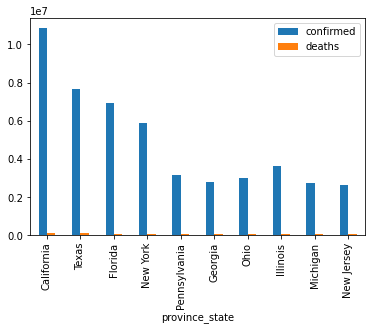

In [118]:
usa4.head(10).plot.bar()

In [107]:
wrld_c = df.query("date == '2022-08-11'").groupby('country_region')['confirmed'].sum().sort_values(ascending=False)
wrld_c

country_region
US                  92719491.0
India               44223557.0
France              34383344.0
Brazil              34124579.0
Germany             31489484.0
                       ...    
Marshall Islands         189.0
Holy See                  29.0
Antarctica                11.0
MS Zaandam                 9.0
Korea, North               1.0
Name: confirmed, Length: 199, dtype: float64

In [108]:
wrld_d = df.query("date == '2022-08-11'").groupby('country_region')['deaths'].sum().sort_values(ascending=False)
wrld_d

country_region
US                      1036325.0
Brazil                   681006.0
India                    526928.0
Russia                   375192.0
Mexico                   328437.0
                          ...    
Marshall Islands              1.0
Antarctica                    0.0
Holy See                      0.0
Winter Olympics 2022          0.0
Summer Olympics 2020          0.0
Name: deaths, Length: 199, dtype: float64

In [109]:
wrld_dp = wrld_d / wrld_c
wrld_dp

country_region
Afghanistan             0.041139
Albania                 0.011147
Algeria                 0.025596
Andorra                 0.003355
Angola                  0.018678
                          ...   
West Bank and Gaza      0.008160
Winter Olympics 2022    0.000000
Yemen                   0.180795
Zambia                  0.012112
Zimbabwe                0.021781
Length: 199, dtype: float64

<AxesSubplot:xlabel='country_region'>

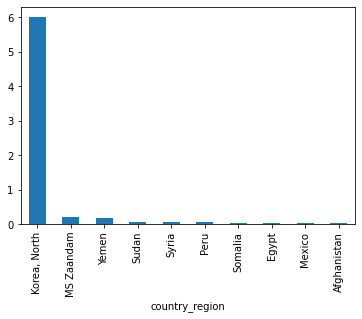

In [120]:
wrld_dp['wrld_dp > 100'].sort_values(ascending=False).head(10).plot(kind='bar')